In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
df = pd.read_csv('/Users/patrickmoll/Desktop/cis590data/DateTimeCleanedData/DateTimeCleanedReservationsAll.csv')
df.head()

,Facility Class,Facility Location,Facility Code,Facility,Status,Reservation Type,Headcount,BeginTimeDate,EndTimeDate,Duration Minutes,Weekday,Month,Year,BeginTime
0,BDEF,CARN,CAREF,Entire Facility,Firm,Facility,100.000000,2013-01-06 09:00:00,2013-01-06 12:30:00,210.0,6,1,2013,9.0
1,BDMUL,CARN,HRTG,Heritage Room l,Firm,Facility,100.000000,2013-01-06 17:00:00,2013-01-06 23:00:00,360.0,6,1,2013,17.0
2,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,2013-01-07 17:30:00,2013-01-07 18:25:00,55.0,0,1,2013,17.5
3,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,2013-01-09 17:30:00,2013-01-09 18:25:00,55.0,2,1,2013,17.5
4,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,2013-01-09 19:00:00,2013-01-09 20:15:00,75.0,2,1,2013,19.0


In [4]:
#We do not need the full date time objects
df = df.drop(columns=['BeginTimeDate', 'EndTimeDate'])
# Convert categorical variables using factorize
cols = ['Facility Class', 'Facility Location', 'Facility Code', 'Facility', 'Status', 'Reservation Type']
df[cols] = df[cols].apply(lambda x: pd.factorize(x)[0])

In [5]:
df.head()

,Facility Class,Facility Location,Facility Code,Facility,Status,Reservation Type,Headcount,Duration Minutes,Weekday,Month,Year,BeginTime
0,0,0,0,0,0,0,100.000000,210.0,6,1,2013,9.0
1,1,0,1,1,0,0,100.000000,360.0,6,1,2013,17.0
2,1,0,1,1,0,1,36.387374,55.0,0,1,2013,17.5
3,1,0,1,1,0,1,36.387374,55.0,2,1,2013,17.5
4,1,0,1,1,0,1,36.387374,75.0,2,1,2013,19.0


In [6]:
x=df.iloc[:, df.columns != 'Facility Class']  #Independent variable
y=df.iloc[:, df.columns == 'Facility Class']   #Target variable
f_score=chi2(x,y)   #returns f score and p value 
f_score

(array([3.50826009e+04, 3.78961697e+05, 3.92562466e+05, 1.18267587e+04,
        1.79440547e+04, 3.20734397e+05, 3.58630106e+06, 6.90152087e+03,
        4.28678443e+02, 1.71599084e+01, 4.61850367e+03]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        6.41204070e-82, 3.09395312e-01, 0.00000000e+00]))

In [7]:
# printing p values for each categorical features
p_value=pd.Series(f_score[1],index=x.columns)
p_value.sort_values(ascending=True,inplace=True)
print(p_value)

Facility Location    0.000000e+00
Facility Code        0.000000e+00
Facility             0.000000e+00
Status               0.000000e+00
Reservation Type     0.000000e+00
Headcount            0.000000e+00
Duration Minutes     0.000000e+00
Weekday              0.000000e+00
BeginTime            0.000000e+00
Month                6.412041e-82
Year                 3.093953e-01
dtype: float64


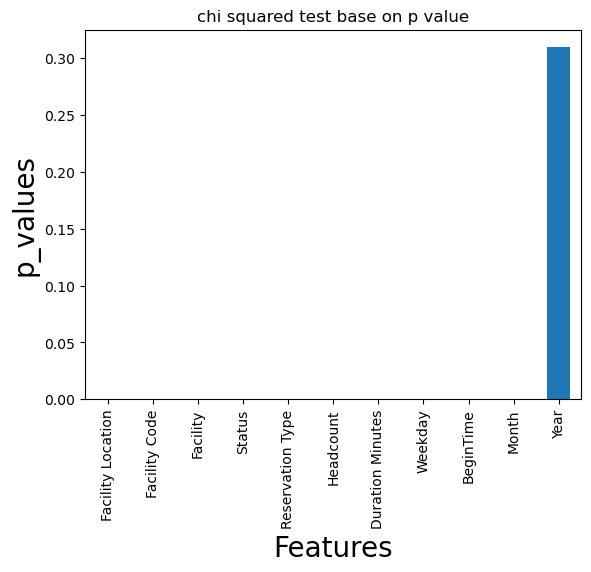

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

p_value.plot(kind="bar")
plt.xlabel("Features",fontsize=20)
plt.ylabel("p_values",fontsize=20)
plt.title("chi squared test base on p value")
plt.show()

In [9]:
x=df.iloc[:, df.columns != 'Reservation Type']  #Independent variable
y=df.iloc[:, df.columns == 'Reservation Type']   #Target variable
f_score=chi2(x,y)   #returns f score and p value 
# printing p values for each categorical features
p_value=pd.Series(f_score[1],index=x.columns)
p_value.sort_values(ascending=True,inplace=True)
print(p_value)

Facility Code         0.000000e+00
Facility              0.000000e+00
Status                0.000000e+00
Headcount             0.000000e+00
Duration Minutes      0.000000e+00
Weekday               0.000000e+00
Facility Location    4.525064e-207
Facility Class        2.180652e-80
BeginTime             5.223466e-27
Month                 4.201561e-01
Year                  8.238688e-01
dtype: float64


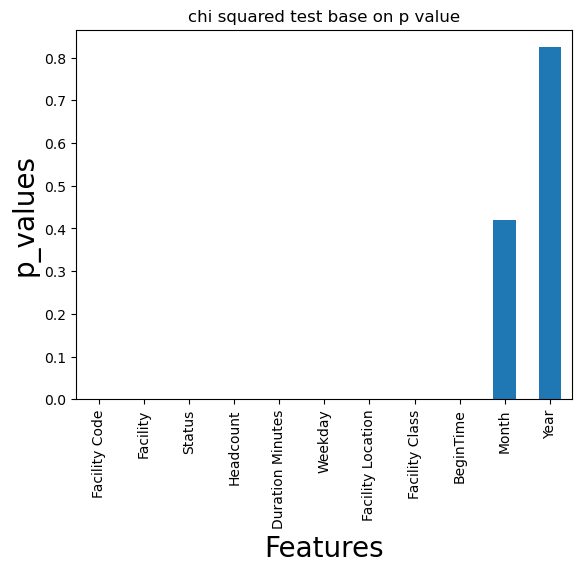

In [29]:
import matplotlib.pyplot as plt 
import seaborn as sns

p_value.plot(kind="bar")
plt.xlabel("Features",fontsize=20)
plt.ylabel("p_values",fontsize=20)
plt.title("chi squared test base on p value")
plt.show()

In [16]:
x=df.iloc[:, df.columns != 'Year']  #Independent variable
y=df.iloc[:, df.columns == 'Year']   #Target variable
f_score=chi2(x,y)   #returns f score and p value 
# printing p values for each categorical features
p_value=pd.Series(f_score[1],index=x.columns)
p_value.sort_values(ascending=True,inplace=True)

New_X = featureSelect_dataframe(x, y, chi2, 6)

New_X

,Facility Class,Facility Code,Facility,Status,Headcount,Duration Minutes
0,0,0,0,0,100.000000,210.0
1,1,1,1,0,100.000000,360.0
2,1,1,1,0,36.387374,55.0
3,1,1,1,0,36.387374,55.0
4,1,1,1,0,36.387374,75.0
...,...,...,...,...,...,...
123644,4,39,39,0,17.949062,300.0
123645,9,22,21,1,7.000000,55.0
123646,9,22,21,1,6.000000,55.0
123647,9,22,21,1,15.000000,45.0


In [17]:
x=df.iloc[:, df.columns != 'Status']  #Independent variable
y=df.iloc[:, df.columns == 'Status']   #Target variable
f_score=chi2(x,y)   #returns f score and p value 
# printing p values for each categorical features
p_value=pd.Series(f_score[1],index=x.columns)
p_value.sort_values(ascending=True,inplace=True)
print(p_value)

Facility Code         0.000000e+00
Facility              0.000000e+00
Reservation Type      0.000000e+00
Headcount             0.000000e+00
Duration Minutes      0.000000e+00
Weekday               0.000000e+00
BeginTime            4.912058e-166
Facility Class        1.033852e-70
Facility Location     1.241432e-53
Year                  1.875472e-24
Month                 6.874981e-16
dtype: float64


In [12]:
from sklearn.feature_selection import SelectKBest

# for classification, we use these three
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# this function will take in X, y variables 
# with criteria, and return a dataframe
# with most important columns
# based on that criteria
def featureSelect_dataframe(X, y, criteria, k):

    # initialize our function/method
    reg = SelectKBest(criteria, k=k).fit(X,y)
    
    # transform after creating the reg (so we can use getsupport)
    X_transformed = reg.transform(X)

    # filter down X based on kept columns
    X = X[[val for i,val in enumerate(X.columns) if reg.get_support()[i]]]

    # return that dataframe
    return X

In [33]:
New_X = featureSelect_dataframe(x, y, chi2, 4)

New_X

,Facility Code,Facility,Headcount,Duration Minutes
0,0,0,100.000000,210.0
1,1,1,100.000000,360.0
2,1,1,36.387374,55.0
3,1,1,36.387374,55.0
4,1,1,36.387374,75.0
...,...,...,...,...
123644,39,39,17.949062,300.0
123645,22,21,7.000000,55.0
123646,22,21,6.000000,55.0
123647,22,21,15.000000,45.0


In [36]:
New_X = featureSelect_dataframe(x, y, mutual_info_classif, 4)

New_X

/Users/patrickmoll/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Facility Code,Facility,Headcount,Duration Minutes
0,0,0,100.000000,210.0
1,1,1,100.000000,360.0
2,1,1,36.387374,55.0
3,1,1,36.387374,55.0
4,1,1,36.387374,75.0
...,...,...,...,...
123644,39,39,17.949062,300.0
123645,22,21,7.000000,55.0
123646,22,21,6.000000,55.0
123647,22,21,15.000000,45.0


In [39]:
from sklearn.feature_selection import mutual_info_regression, f_regression
New_X = featureSelect_dataframe(x, y, mutual_info_regression, 4)

New_X

/Users/patrickmoll/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Facility Code,Facility,Headcount,Duration Minutes
0,0,0,100.000000,210.0
1,1,1,100.000000,360.0
2,1,1,36.387374,55.0
3,1,1,36.387374,55.0
4,1,1,36.387374,75.0
...,...,...,...,...
123644,39,39,17.949062,300.0
123645,22,21,7.000000,55.0
123646,22,21,6.000000,55.0
123647,22,21,15.000000,45.0


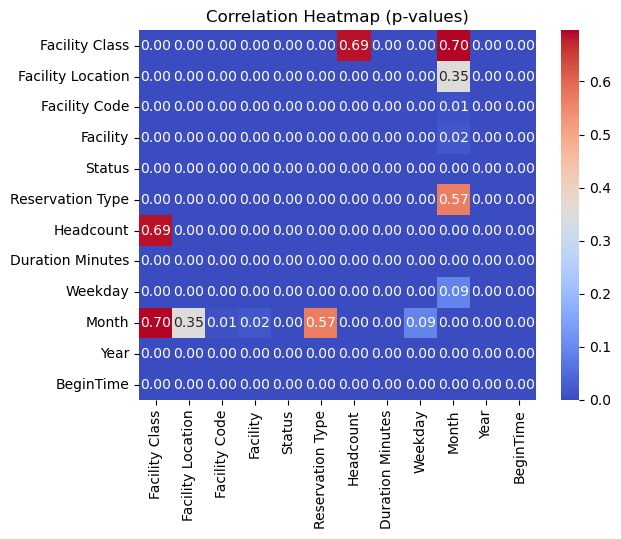

In [19]:
corr_matrix = df.corr()
#p_values = corr_matrix.apply(lambda x: x.apply(lambda y: float("{:.2f}".format(y))))

from scipy.stats import pearsonr

p_values = corr_matrix.copy()

for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        pearson_coef, p_value = pearsonr(df[i], df[j])
        p_values.loc[i, j] = p_value
# create a heatmap using seaborn
sns.heatmap(p_values, cmap='coolwarm', annot=True, fmt='.2f')

plt.title('Correlation Heatmap (p-values)')
plt.show()

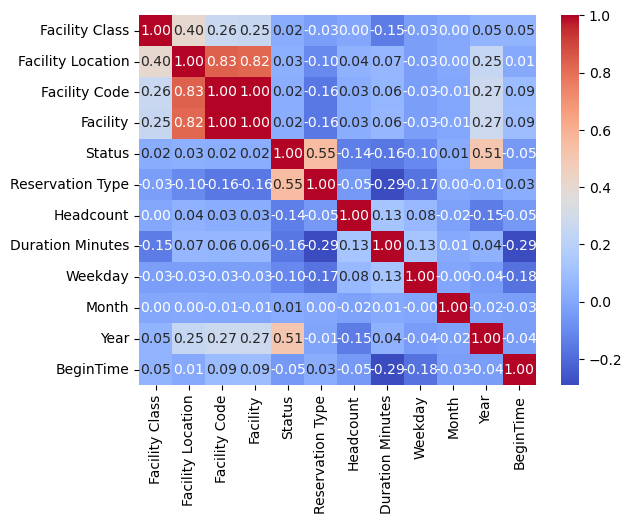

<Figure size 640x480 with 0 Axes>

In [21]:
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

plt.show()
plt.savefig('CorrelationHeatmap.pdf')